# 1. Introduction


Nama : Dery Rai Ambhara

Batch : RMT 034

saya bekerja sebagai guru bk di sebuah sekolah dibandung, tujuan notebook ini digunakan atau model ini dibuat gunanya untuk mengetahui ekspresi siswa siswi yang masuk ke ruangan kelas,hasil dari ekspresinya di kirim ke wali kelasnya masing masing, guna diproses lebih lanjut , apa yang membuat siswa/i tersebut menjadi senang,sedih,ataupun kaget ketika memasuki ruangan kelas

# 2. Library

In [1]:
# Import libraries

import os
import cv2
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 3. Data Loading

In [2]:
!unzip ./face_exp.zip


Archive:  ./face_exp.zip
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (1).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (10).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (100).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (11).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (12).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (13).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (14).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (15).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (16).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (17).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (18).jpg  
  inflating: Face Expressions (Happy, Sad, Surprise)/test/happy/happy (19).jpg  
  i

In [3]:
# Define path

main_path = '/content/Face Expressions (Happy, Sad, Surprise)'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'test')

copy path gambar face expression dan membaginya menjadi train path dan test path

# 4. Exploratory Data Analysis

In [4]:

IMG_SIZE = 400
path = '/content/Face Expressions (Happy, Sad, Surprise)/train'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='categorical', shuffle=True) # `class_mode=categorical` for multiclass

Found 3423 images belonging to 3 classes.


terdapat 3423 gambar yang berhasil didapatkan yang kemudian dibagi menjadi 3 class

In [5]:
# Show images in pixel form

print('Images : ', data[0][0])
print('Shape  : ', data[0][0].shape)

Images :  [[[[210. 221. 225.]
   [210. 221. 225.]
   [210. 221. 225.]
   ...
   [165. 131. 103.]
   [165. 131. 103.]
   [165. 131. 103.]]

  [[210. 221. 225.]
   [210. 221. 225.]
   [210. 221. 225.]
   ...
   [165. 131. 103.]
   [165. 131. 103.]
   [165. 131. 103.]]

  [[210. 221. 225.]
   [210. 221. 225.]
   [210. 221. 225.]
   ...
   [165. 131. 103.]
   [165. 131. 103.]
   [165. 131. 103.]]

  ...

  [[227. 226. 231.]
   [227. 226. 231.]
   [227. 226. 231.]
   ...
   [228. 233. 237.]
   [228. 233. 237.]
   [228. 233. 237.]]

  [[227. 226. 231.]
   [227. 226. 231.]
   [227. 226. 231.]
   ...
   [228. 233. 237.]
   [228. 233. 237.]
   [228. 233. 237.]]

  [[227. 226. 231.]
   [227. 226. 231.]
   [227. 226. 231.]
   ...
   [228. 233. 237.]
   [228. 233. 237.]
   [228. 233. 237.]]]


 [[[ 24.   0.   0.]
   [ 24.   0.   0.]
   [ 23.   0.   0.]
   ...
   [ 23.   0.   0.]
   [ 26.   0.   0.]
   [ 26.   0.   0.]]

  [[ 24.   0.   0.]
   [ 24.   0.   0.]
   [ 23.   0.   0.]
   ...
   [ 23.   

bentuk ukuran gambar menjadi Shape  :  (32, 400, 400, 3)

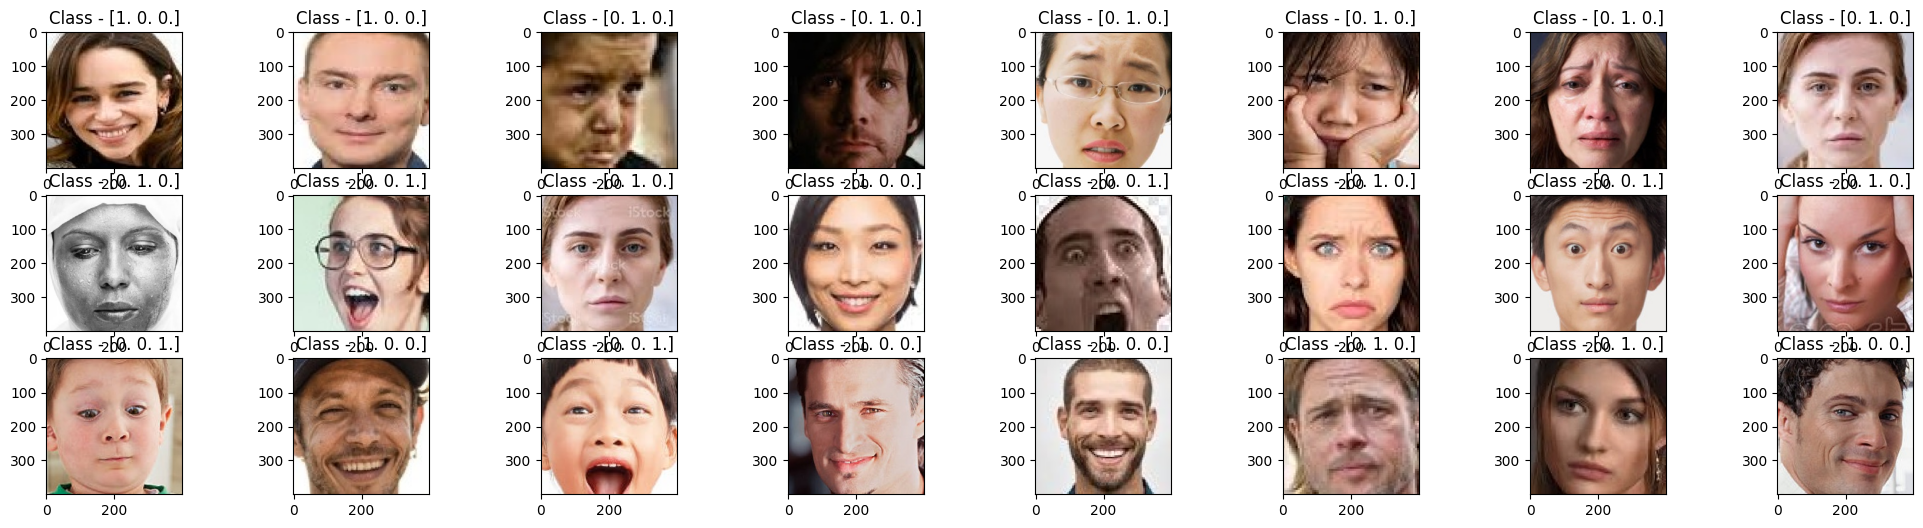

In [ ]:
# Show each of image from both categories

fig, ax = plt.subplots(nrows=3, ncols=8, figsize=(25,6))
n = 0

for i in range(3):
  for j in range(8):
    img = data[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(data[0][1][n]))
    n += 1

untuk ekspresi wajah manusia yang senang kebanyakan ditunjukan dengan terlihatnya gigi atau mulut yang terbuka

untuk ekspresi wajah manusia yang sedih kebanyakan ditunjukan dengan menyempiotnya mata ditambah dengan tertutupnya mulut

untuk ekspresi wajah manusia yang terkejut kebanyakan ditunjukan dengan melebarnya mata atau melotot

# 5. Feature Engineering

In [6]:
# Define hyperparameters

img_height= 250
img_width= 250
batch_size= 64

height gambar dan width gambar menjadi 250x250 dengan batch size 64

In [7]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.4)

train_set = train_datagen.flow_from_directory(path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            subset='validation',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 2055 images belonging to 3 classes.
Found 1368 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


membagi data menjadi train dan val
jumlah data train 2055 dan jumlah data val 1368

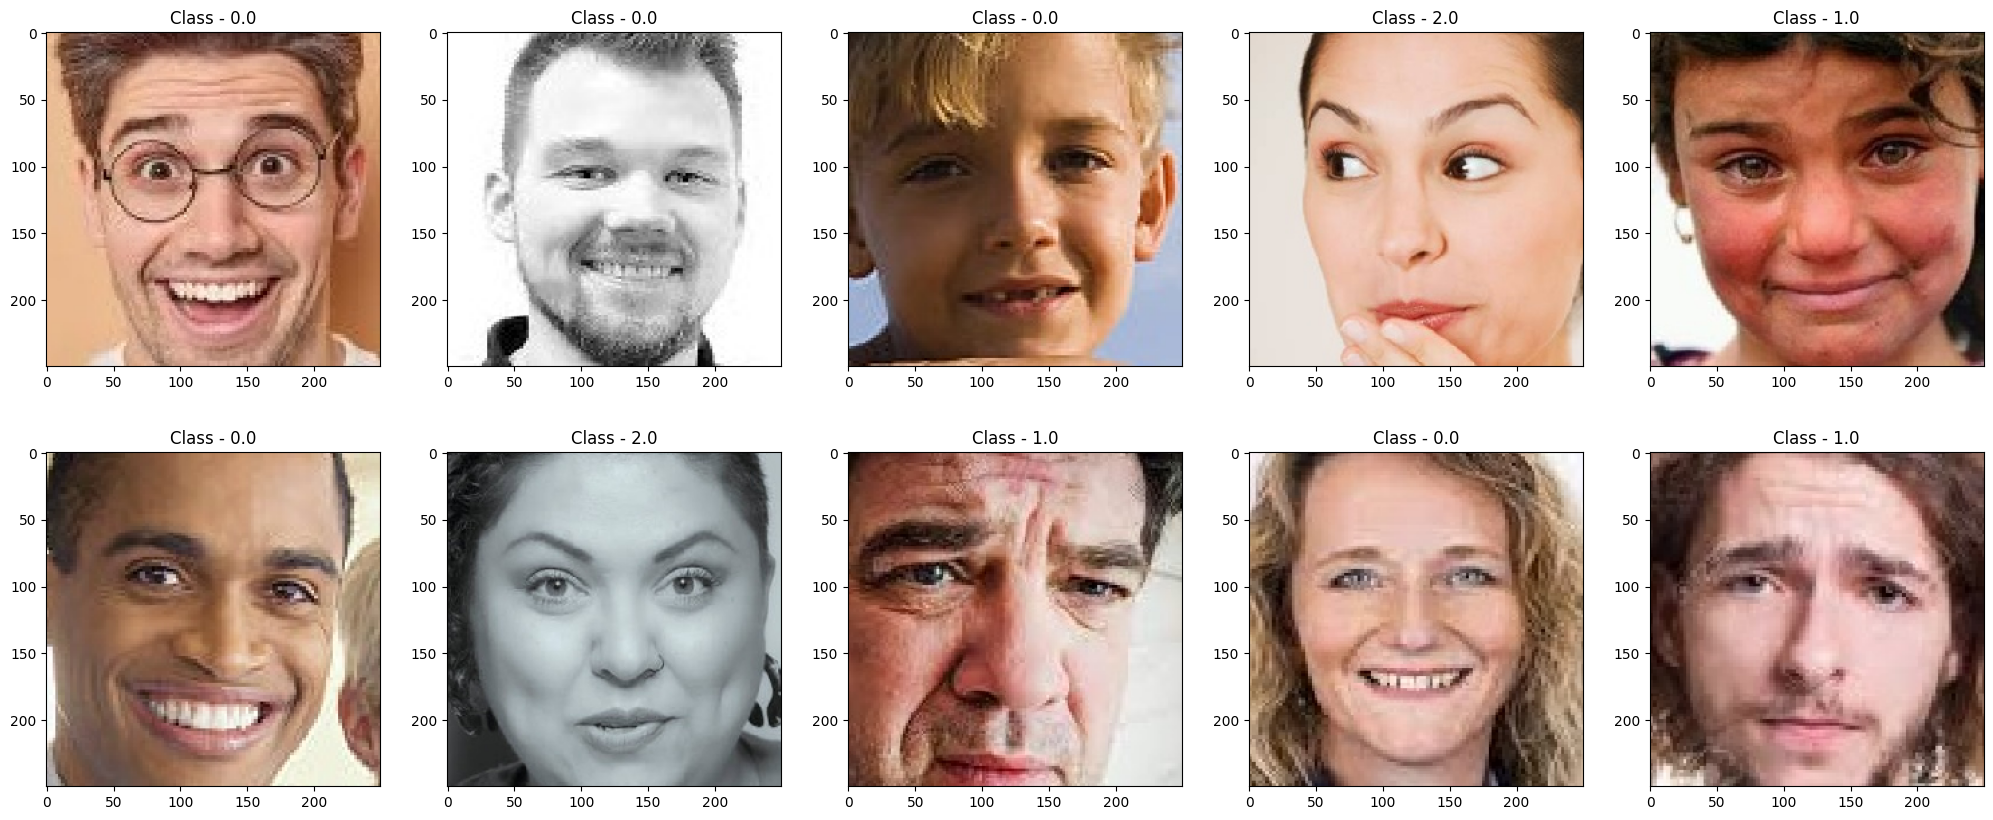

In [ ]:
# Show images of train-set

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10))
n = 0

for i in range(2):
  for j in range(5):
    img = train_set[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(train_set[0][1][n]))
    n += 1

gambar gambar yang didapat di train set

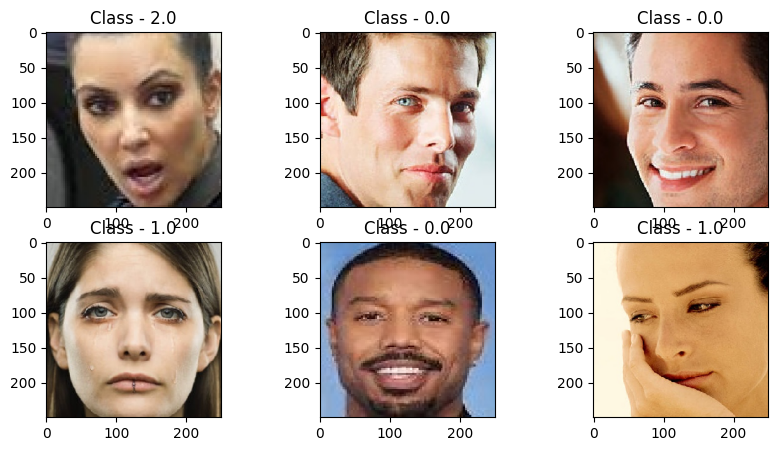

In [ ]:
# Show images of val-set

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
n = 0

for i in range(2):
  for j in range(3):
    img = val_set[0][0][n].astype('uint8')
    ax[i][j].imshow(img)
    ax[i][j].set_title('Class - ' + str(val_set[0][1][n]))
    n += 1

gambar gambar yang terdapat di val set

In [ ]:
# Show labels

train_set.class_indices

{'happy': 0, 'sad': 1, 'surprise': 2}

penunjukan class class happy angka 0 , sedih angka 1, surprise angka 2

# 6. ANN Training

## 6.1 Model Definition

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

clear session

pembuatan model dengan penambahan layer layer dan penambahan flatten dan dropout

In [ ]:
# Create Sequential API model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      55,116,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,211,075 (210.61 MB)

 Trainable params: 55,211,075 (210.61 MB)

 Non-trainable params: 0 (0.00 B)

terdapat total paramater berjumlah 55,212,075

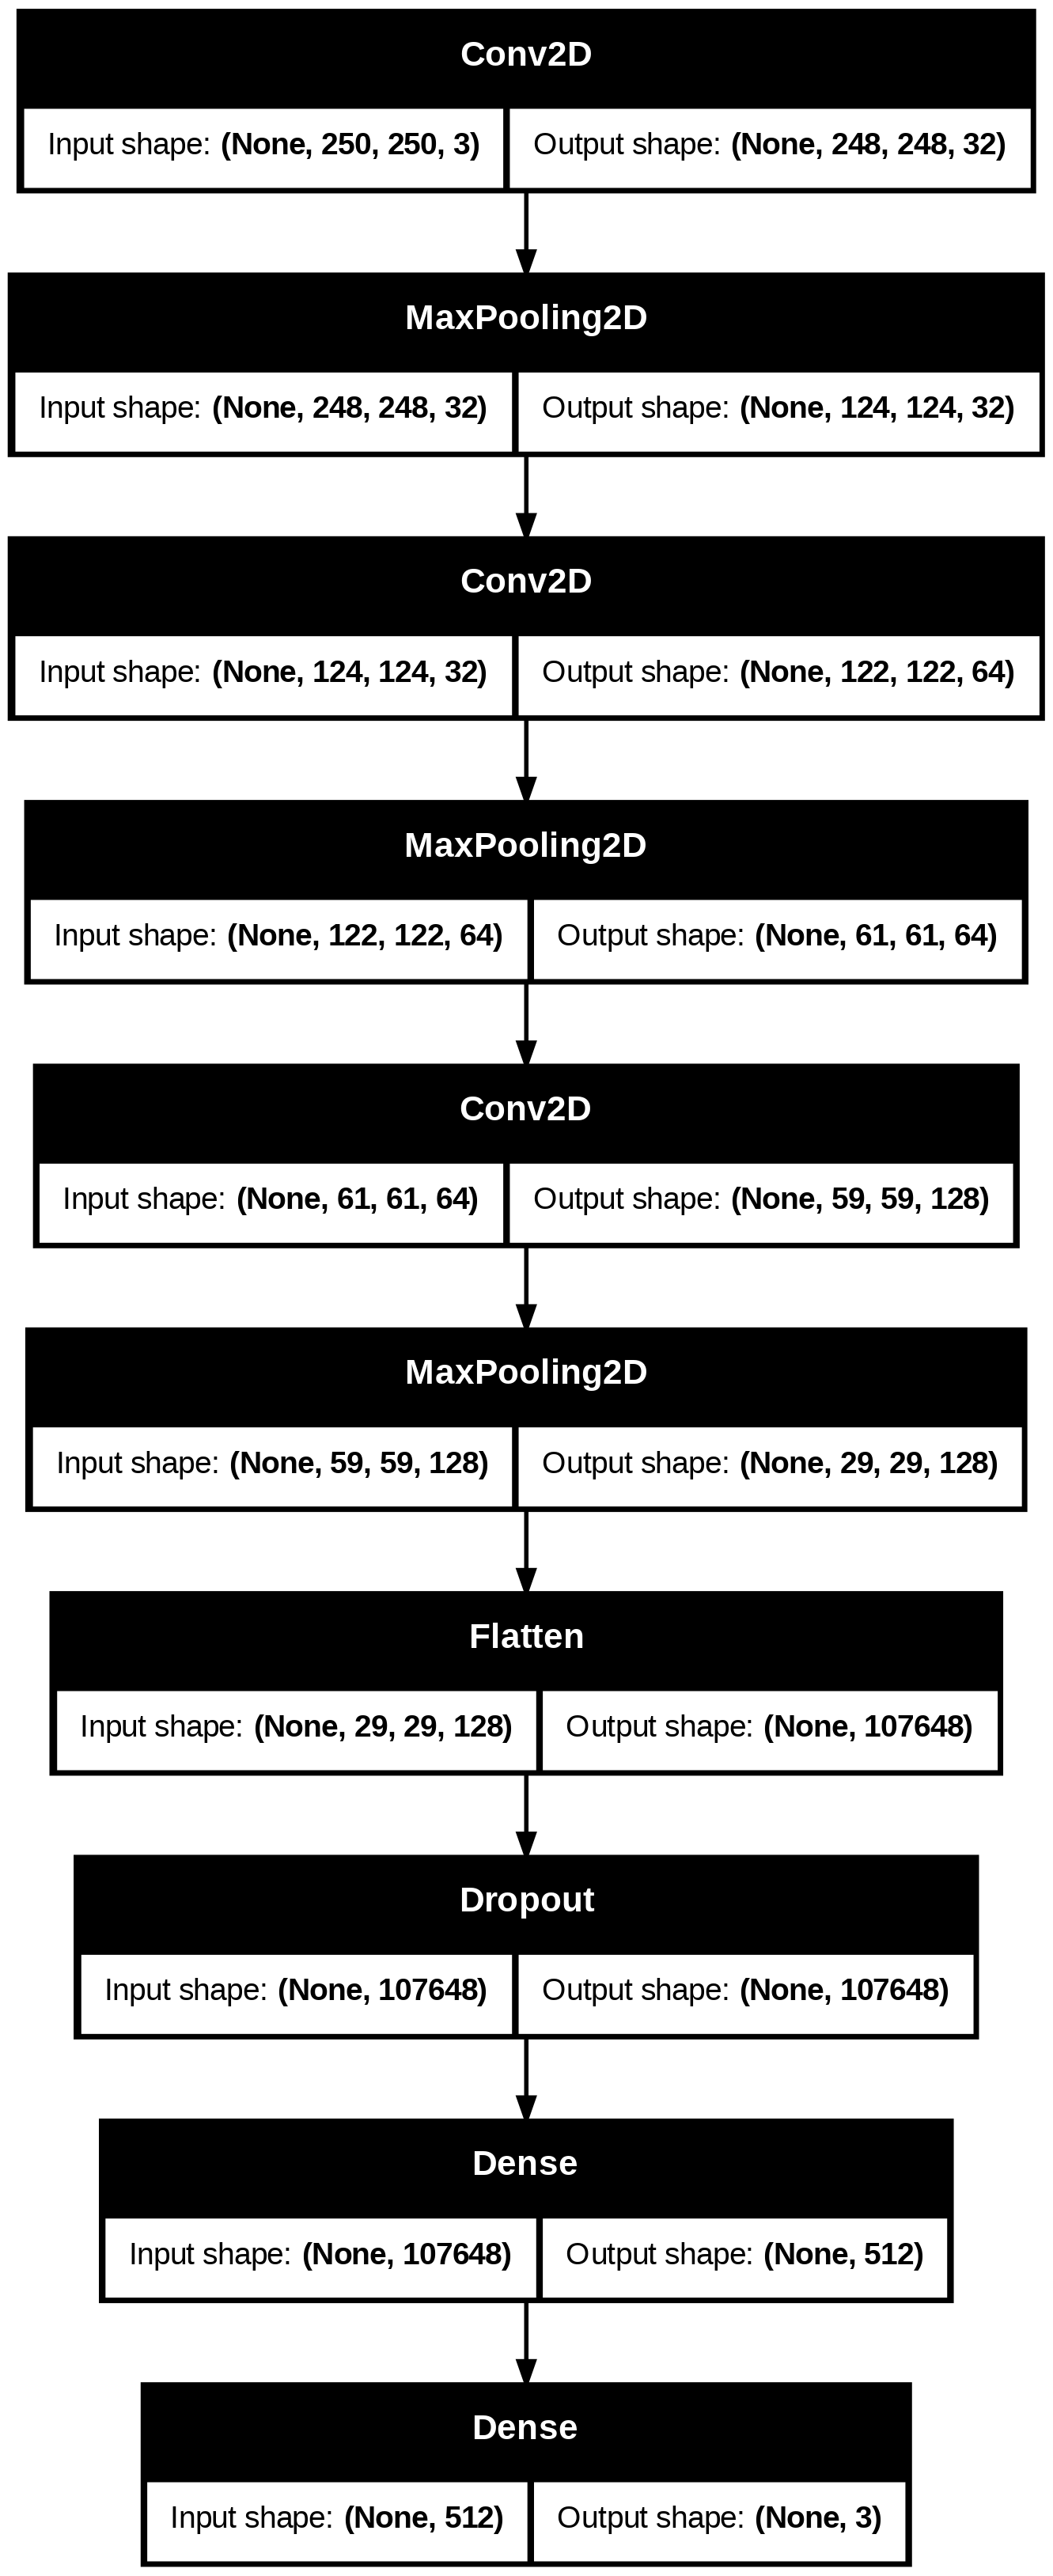

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model, show_shapes=True)

## 6.2 Model Training

In [ ]:
# Train the model

%%time
history = model.fit(train_set, epochs=20, validation_data=val_set, batch_size=batch_size)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 573ms/step - accuracy: 0.3737 - loss: 572.0432 - val_accuracy: 0.5804 - val_loss: 0.8803
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.6879 - loss: 0.7385 - val_accuracy: 0.6615 - val_loss: 0.7799
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 301ms/step - accuracy: 0.7825 - loss: 0.5390 - val_accuracy: 0.6667 - val_loss: 0.8231
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 309ms/step - accuracy: 0.8336 - loss: 0.4251 - val_accuracy: 0.6871 - val_loss: 0.7939
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - accuracy: 0.8694 - loss: 0.3492 - val_accuracy: 0.7266 - val_loss: 0.7223
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.8812 - loss: 0.3313 - val_accuracy: 0.7281 - val_loss: 0.7393
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.8793 - loss: 0.2969 - val_accuracy: 0.7171 - val_loss: 0.7783
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 286ms/step - accuracy: 0.8894 - loss: 0.2687 - val_acc

## 6.3 Model Evaluation

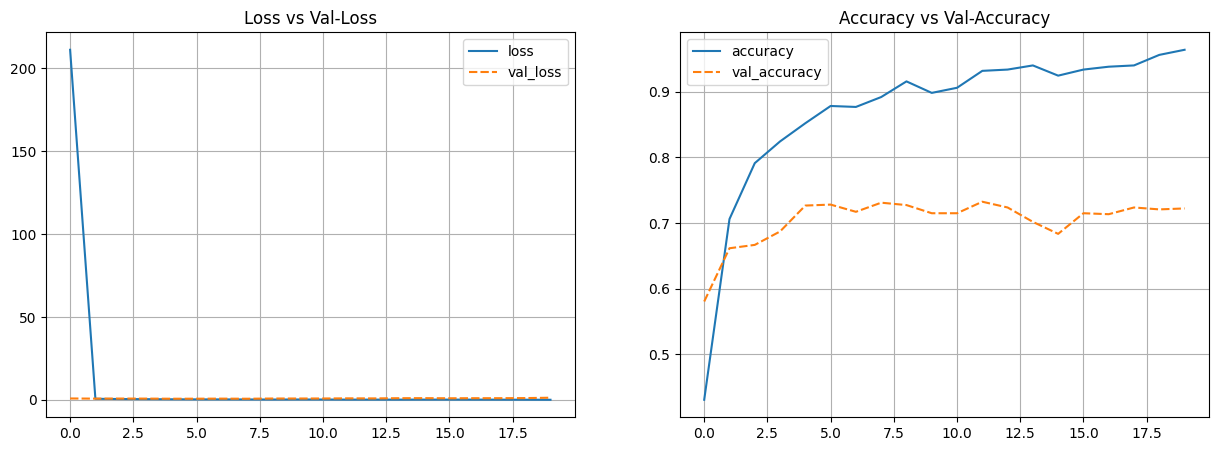

In [ ]:
# Plot training results

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [ ]:
# Get the probability predictions
y_pred_prob = model.predict(test_set)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Assuming test_set.classes contains the true labels
print(classification_report(test_set.classes, y_pred_class, target_names=test_set.class_indices.keys()))


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step
              precision    recall  f1-score   support

       happy       0.52      0.83      0.64        92
         sad       0.46      0.42      0.44        93
    surprise       0.91      0.40      0.55        81

    accuracy                           0.55       266
   macro avg       0.63      0.55      0.54       266
weighted avg       0.62      0.55      0.54       266



dari hasil model training data masih overfit dengan loss dan val loss pada epoch 20 lossnya 0.046 sedangkan val loss nya 1.3 ini dikarnakan data belum dilakukan augmentation

# 7. ANN improvement

## 7.1 Improvement with augmentation

### 7.1.1 Model Definition

In [8]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.05,
                                                                    width_shift_range=0.05,
                                                                    height_shift_range=0.05,
                                                                    shear_range=0.05,
                                                                    horizontal_flip=True,
                                                                    validation_split=0.4)

train_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                      target_size=(img_height,img_width),
                                                      class_mode='sparse',
                                                      subset='training',
                                                      batch_size=batch_size,
                                                      shuffle=True,
                                                      seed=2)

val_set_aug = train_datagen_aug.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_directory(test_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    seed=2)

Found 2055 images belonging to 3 classes.
Found 1368 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


In [10]:
# Create Sequential API model

model_aug = Sequential()
model_aug.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(64, (3,3), activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Conv2D(128, (3,3),activation='relu'))
model_aug.add(MaxPooling2D(2, 2))
model_aug.add(Flatten())
model_aug.add(Dropout(0.5))
model_aug.add(Dense(512, activation='relu'))
model_aug.add(Dense(3, activation='softmax'))

# Compile
model_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_aug.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      55,116,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,211,075 (210.61 MB)

 Trainable params: 55,211,075 (210.61 MB)

 Non-trainable params: 0 (0.00 B)

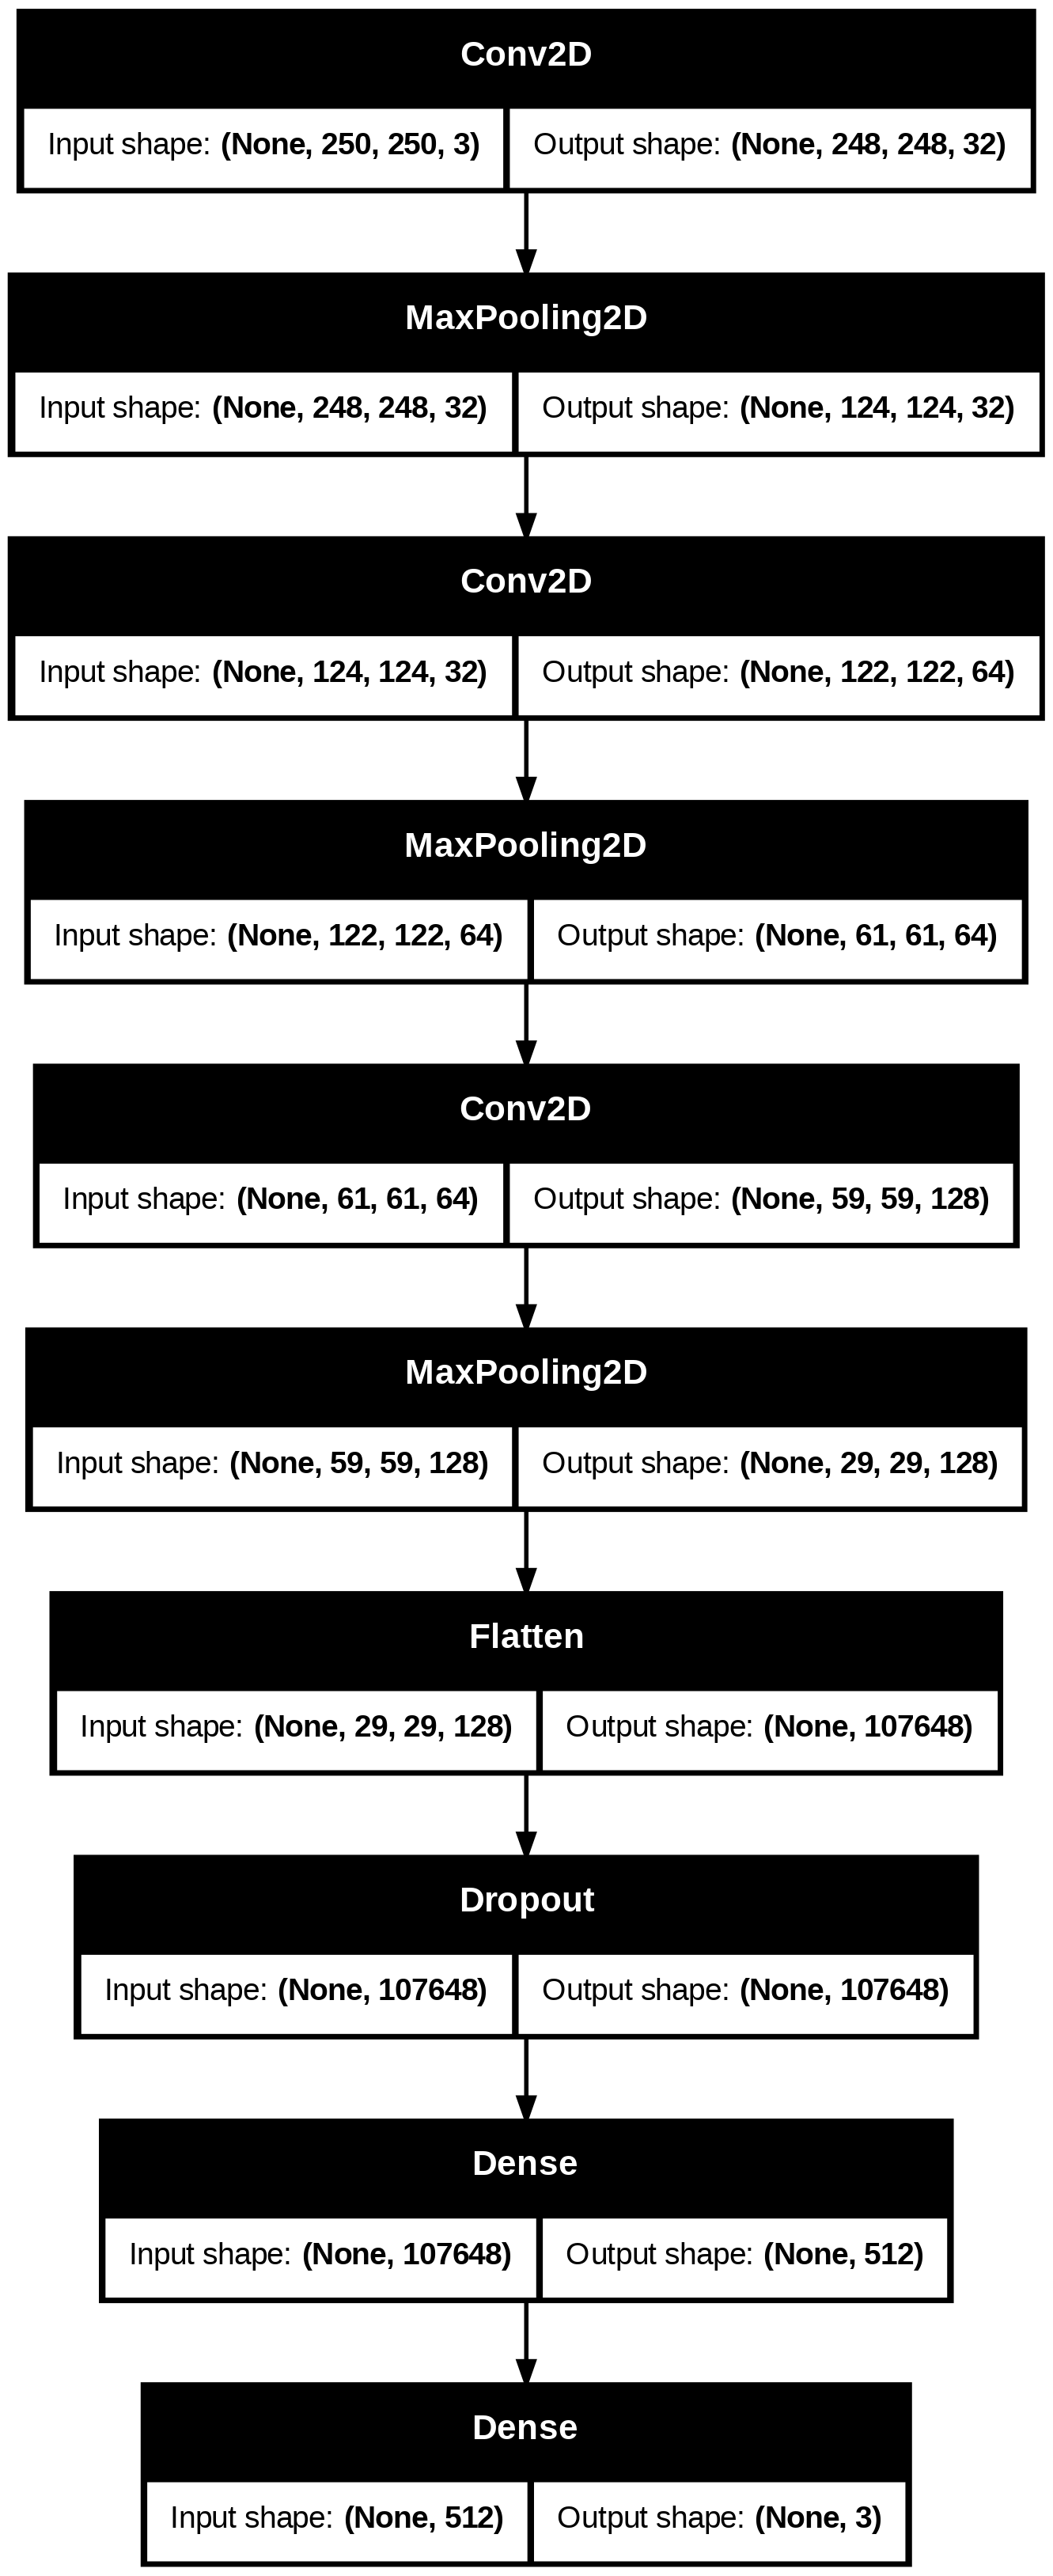

In [11]:
# Plot layers

tf.keras.utils.plot_model(model_aug, show_shapes=True)

### 7.1.2 Model Training

In [14]:
# Train the model

%%time
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_aug = model_aug.fit(train_set_aug, epochs=20, validation_data=val_set_aug,callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5943 - loss: 0.9020 - val_accuracy: 0.4525 - val_loss: 1.0673
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5288 - loss: 0.9796 - val_accuracy: 0.5885 - val_loss: 0.9116
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5906 - loss: 0.8860 - val_accuracy: 0.6425 - val_loss: 0.8097
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6195 - loss: 0.8442 - val_accuracy: 0.5775 - val_loss: 0.9546
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6168 - loss: 0.8459 - val_accuracy: 0.6016 - val_loss: 0.9077
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6517 - loss: 0.7835 - val_accuracy: 0.6308 - val_loss: 0.8208
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6873 - loss: 0.7650 - val_accuracy: 0.6294 - val_loss: 0.8678
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6441 - loss: 0.7993 - val_accuracy: 0.6535 - val_loss:

### 7.1.3 Model Evaluation

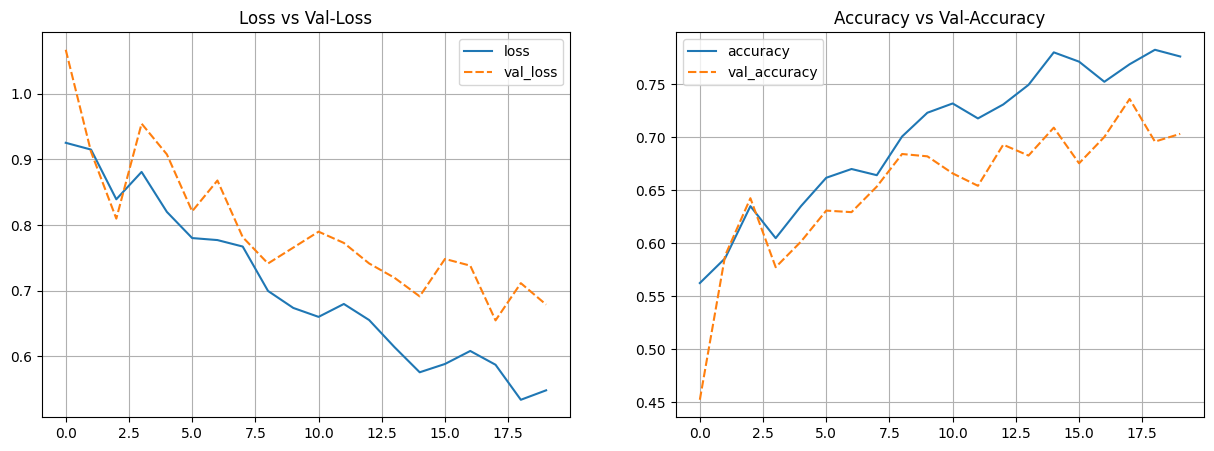

In [15]:
# Plot training results

history_df = pd.DataFrame(history_aug.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [16]:
# Get the probability predictions
y_pred_prob = model_aug.predict(test_set)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Assuming test_set.classes contains the true labels
print(classification_report(test_set.classes, y_pred_class, target_names=test_set.class_indices.keys()))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step
              precision    recall  f1-score   support

       happy       0.58      0.96      0.72        92
         sad       0.54      0.42      0.47        93
    surprise       0.83      0.43      0.57        81

    accuracy                           0.61       266
   macro avg       0.65      0.60      0.59       266
weighted avg       0.64      0.61      0.59       266



Berdasarkan Log training menggunakan augmentation:

Akurasi train meningkat secara konsisten dari 36.4% hingga 82.9% dalam 20 epoch. Akurasi Validasi dimulai dari 55.3%, terus meningkat hingga mencapai 76.2% pada akhir epoch.

Loss train dimulai sangat tinggi pada 278.9 (menunjukkan kesulitan pada awal pelatihan), kemudian terus turun hingga 0.43 di akhir pelatihan. sedangankan Loss Validasi berfluktuasi, tetapi secara umum menunjukkan penurunan, dari 1.0 hingga sekitar 0.67.

dengan accuracy pada classification report ditunjukan pada 0.61 model ini mampu menangkap gambar ekspresi muka senang dengan baik dengan recall 0.96 dan f1 score 0.72 paling tinggi dibandingkan dengan ekspresi muka yang lain

model tidak menunjukan overfit maupun underfit maka model bisa dibilang goodfit dengan acuan accuracy pada train dan val tidak begitu jauh

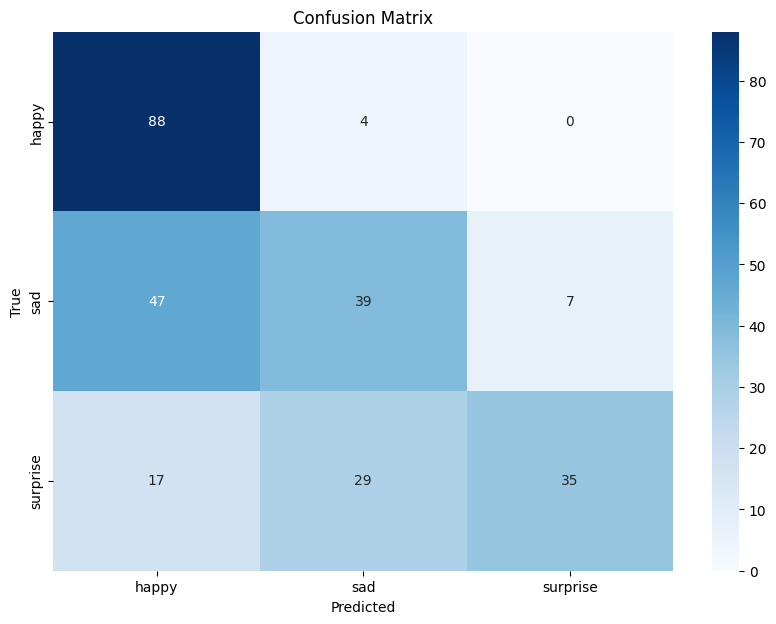

In [17]:
# Create a confusion matrix
cm = confusion_matrix(test_set.classes, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

untuk confusion matrix untuk mengetahui true positif happy dari 92 data terdetek 88 menunjukan model cukup baik menangkap ekspresi wajah happy

sedangkan untuk true positif sad hanya 39 dari 93 data menunjukan model tidak cukup baik menangkap ekspresi wajah sad

dan surpise dari 81 data menangkap 35 sebagai true positif menunjukan lebih dari 50% dari data

## 8.1 Improvement with Transfer Learning using VGG16

### 8.1.1 Model Definition

In [ ]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 64

In [ ]:

pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
pretrained_model.trainable = False

In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.05,
                                                                   width_shift_range=0.05,
                                                                   height_shift_range=0.05,
                                                                   shear_range=0.05,
                                                                   horizontal_flip=True,
                                                                   validation_split=0.4,
                                                                   preprocessing_function=preprocess_input)

train_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

val_set_tl = train_datagen_tl.flow_from_directory(train_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  subset='validation',
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=2)

test_datagen_tl = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl = test_datagen_tl.flow_from_directory(test_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=2)

Found 2055 images belonging to 3 classes.
Found 1368 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential API model
model_tl = Sequential()
model_tl.add(pretrained_model)

# The input shape needs to include the batch size.
# Use None to represent a variable batch size
input_shape = (None, img_height, img_width, 3)
model_tl.build(input_shape=input_shape)

model_tl.add(Flatten())
model_tl.add(Dropout(0.5))
model_tl.add(Dense(512, activation='relu'))
model_tl.add(BatchNormalization())
model_tl.add(Dense(3, activation='softmax'))

# Compile the model
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Use the correct variable name here
model_tl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,563,843 (105.15 MB)

 Trainable params: 12,848,131 (49.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

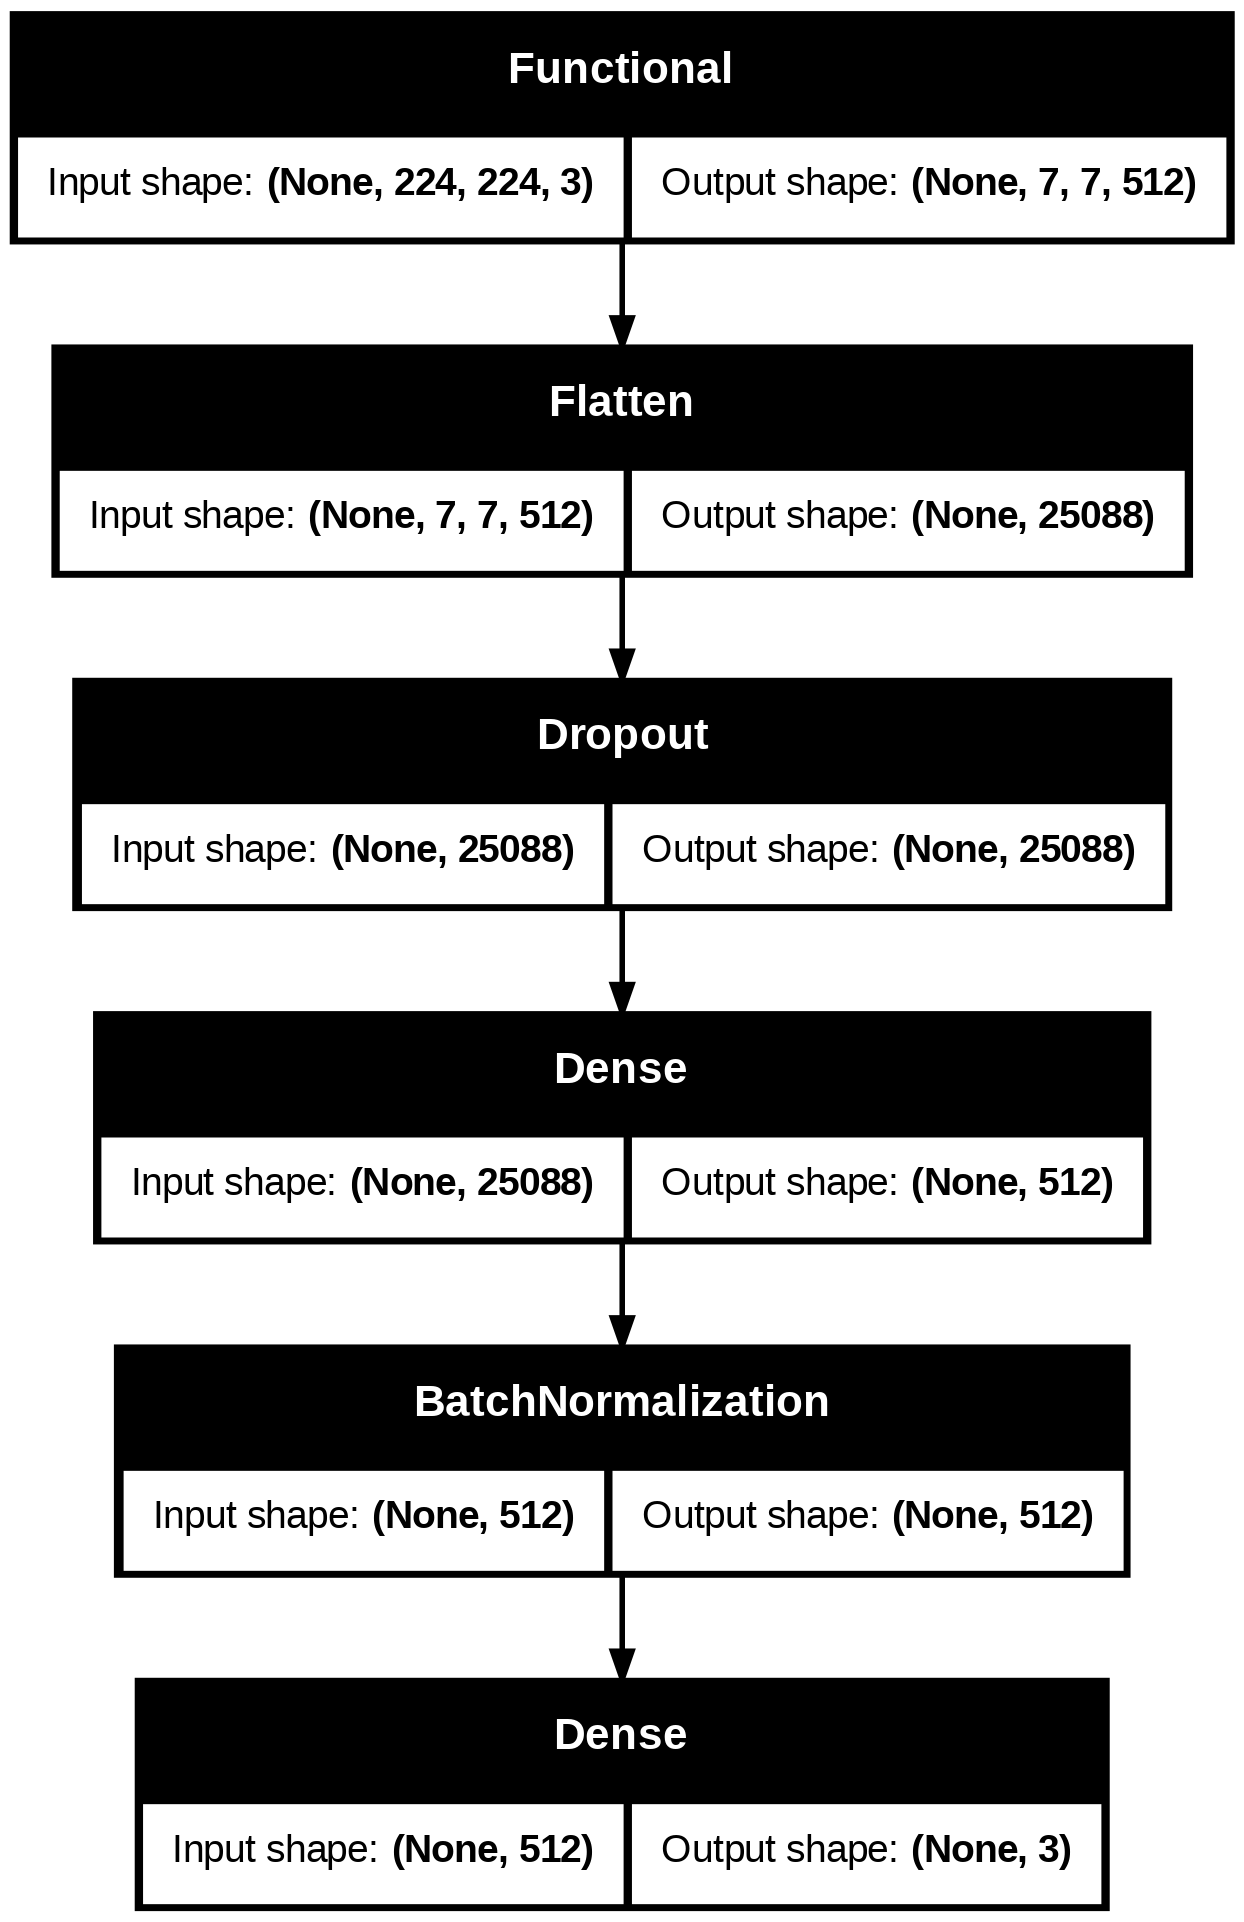

In [ ]:
# Plot layers

tf.keras.utils.plot_model(model_tl, show_shapes=True)

### 8.1.2 Model Training

In [ ]:
# Train the model

%%time

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_tl = model_tl.fit(train_set_tl, epochs=20, validation_data=val_set_tl,callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.6771 - loss: 1.0392 - val_accuracy: 0.6930 - val_loss: 2.3163
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.8778 - loss: 0.3613 - val_accuracy: 0.7639 - val_loss: 1.1932
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9134 - loss: 0.2313 - val_accuracy: 0.7602 - val_loss: 1.0154
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9190 - loss: 0.2129 - val_accuracy: 0.7463 - val_loss: 1.0472
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9411 - loss: 0.1739 - val_accuracy: 0.7749 - val_loss: 0.8154
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9416 - loss: 0.1755 - val_accuracy: 0.7485 - val_loss: 0.9058
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9420 - loss: 0.1558 - val_accuracy: 0.7573 - val_loss: 0.8560
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9558 - loss: 0.1292 - val_accuracy: 0.7865 - val_loss

### 8.1.3 Model Evaluation

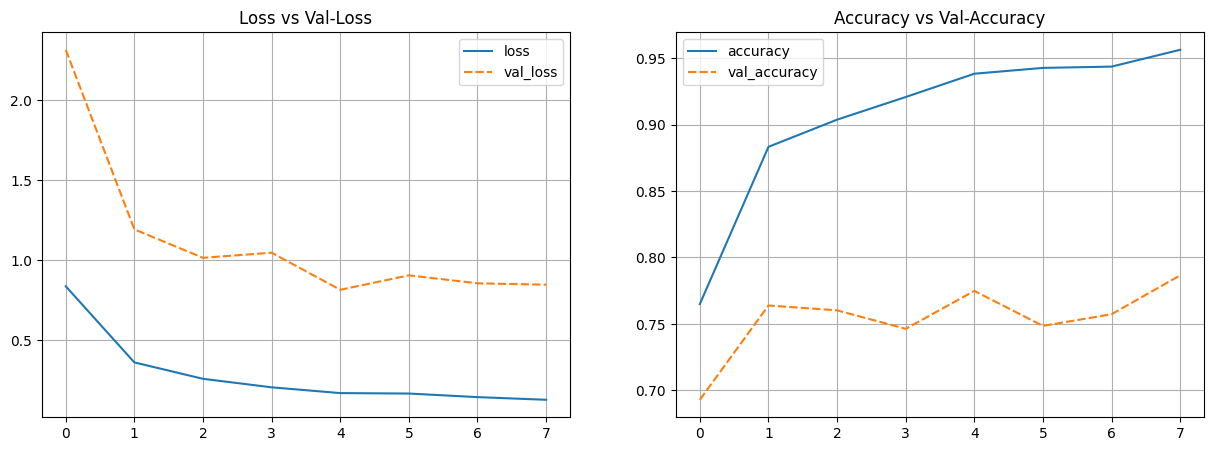

In [ ]:
# Plot training results

history_tl_df = pd.DataFrame(history_tl.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_tl_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_tl_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_tl = model_tl.predict(test_set_tl)

## Get class with maximum probability
y_pred_class_tl = np.argmax(y_pred_prob_tl, axis=-1)

## Display Classification Report
print(classification_report(test_set_tl.classes, y_pred_class_tl, target_names=np.array(list(train_set_tl.class_indices.keys()))))

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step
              precision    recall  f1-score   support

       happy       0.67      0.95      0.78        92
         sad       0.72      0.61      0.66        93
    surprise       0.88      0.62      0.72        81

    accuracy                           0.73       266
   macro avg       0.76      0.73      0.72       266
weighted avg       0.75      0.73      0.72       266



setelah dilakukan improvement dengan menggunakan transfer learning memakai vgg16 hasil dari pelatihannya malah menjadi overfit namun akurasi pengujian naik dengan akurasi 0.73 tetapi gap antara akurasi dengan val akurasi dan loss dengan val loss yang cukup jauh membuat model overfit

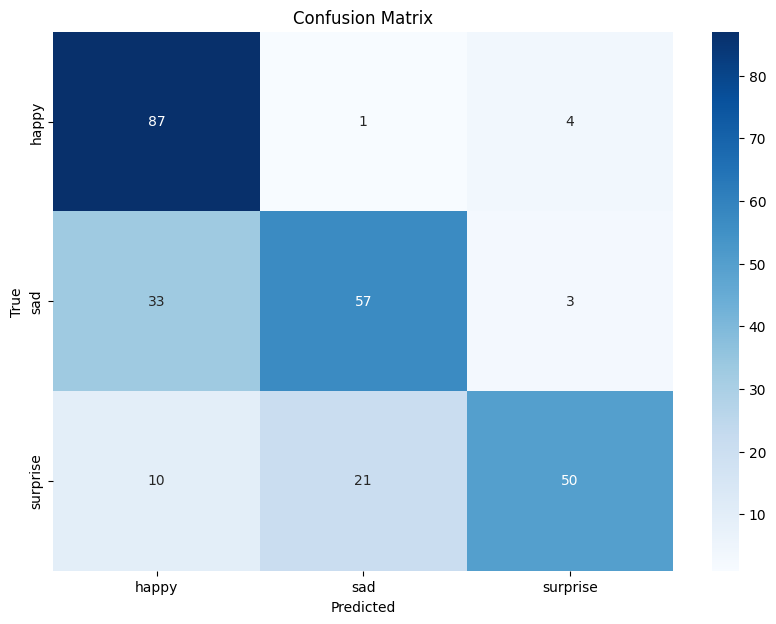

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(test_set_tl.classes, y_pred_class_tl)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set_tl.class_indices.keys(), yticklabels=test_set_tl.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

untuk confusion matrix untuk mengetahui true positif happy dari 92 data terdetek 87 menunjukan model cukup baik menangkap ekspresi wajah happy

sedangkan untuk true positif sad hanya 57 dari 93 data menunjukan model tidak cukup baik menangkap ekspresi wajah sad

dan surpise dari 81 data menangkap 50 sebagai true positif menunjukan lebih dari 50% dari data

## 9.1 Improvement with Transfer Learning using RestNet

### 9.1.1 Model Definition

In [ ]:
# Define hyperparameters

img_height= 224
img_width= 224
batch_size= 64

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
rest_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))
rest_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Create batch generator for train-set, val-set, and test-set

train_datagen_tl2 = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.05,
                                                                   width_shift_range=0.05,
                                                                   height_shift_range=0.05,
                                                                   shear_range=0.05,
                                                                   horizontal_flip=True,
                                                                   validation_split=0.4,
                                                                   preprocessing_function=preprocess_input)

train_set_tl2 = train_datagen_tl2.flow_from_directory(train_path,
                                                    target_size=(img_height,img_width),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    seed=2)

val_set_tl2 = train_datagen_tl2.flow_from_directory(train_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  subset='validation',
                                                  batch_size=batch_size,
                                                  shuffle=True,
                                                  seed=2)

test_datagen_tl2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

test_set_tl2 = test_datagen_tl2.flow_from_directory(test_path,
                                                  target_size=(img_height,img_width),
                                                  class_mode='sparse',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=2)

Found 2055 images belonging to 3 classes.
Found 1368 images belonging to 3 classes.
Found 266 images belonging to 3 classes.


In [ ]:
# Clear session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# Create Sequential API model
model_rn = Sequential()
model_rn.add(rest_model)

# The input shape needs to include the batch size.
# Use None to represent a variable batch size
input_shape = (None, img_height, img_width, 3)
model_rn.build(input_shape=input_shape)

model_rn.add(Flatten())
model_rn.add(Dropout(0.5))
model_rn.add(Dense(512, activation='relu'))
model_rn.add(BatchNormalization())
model_rn.add(Dense(3, activation='softmax'))

# Compile the model
model_rn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_rn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,972,035 (286.00 MB)

 Trainable params: 51,383,299 (196.01 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

### 9.1.2 Model Training

In [ ]:
# Train the model

%%time

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_rn = model_rn.fit(train_set_tl2, epochs=20, validation_data=val_set_tl2,callbacks=[early_stopping], batch_size=batch_size)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.7177 - loss: 1.0631 - val_accuracy: 0.6170 - val_loss: 2.6848
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9013 - loss: 0.2615 - val_accuracy: 0.7785 - val_loss: 0.8309
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9472 - loss: 0.1444 - val_accuracy: 0.7800 - val_loss: 0.7689
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9650 - loss: 0.1033 - val_accuracy: 0.7507 - val_loss: 0.8880
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9476 - loss: 0.1149 - val_accuracy: 0.7953 - val_loss: 0.6954
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9695 - loss: 0.0773 - val_accuracy: 0.8114 - val_loss: 0.6301
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9807 - loss: 0.0630 - val_accuracy: 0.7895 - val_loss: 0.7710
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9784 - loss: 0.0797 - val_accuracy: 0.8063 - val_loss:

### 9.1.3 Model evaluasi

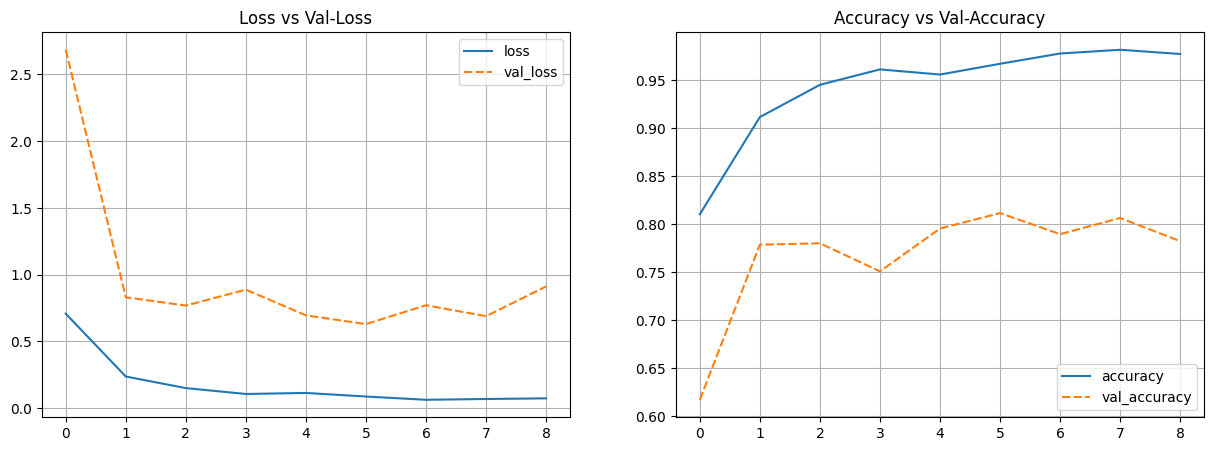

In [ ]:
# Plot training results

history_rn_df = pd.DataFrame(history_rn.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_rn_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_rn_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

In [ ]:
# Check the performance of test-set

## Get the probability
y_pred_prob_tl2 = model_rn.predict(test_set_tl2)

## Get class with maximum probability
y_pred_class_tl2 = np.argmax(y_pred_prob_tl2, axis=-1)

## Display Classification Report
print(classification_report(test_set_tl2.classes, y_pred_class_tl2, target_names=np.array(list(train_set_tl2.class_indices.keys()))))

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
              precision    recall  f1-score   support

       happy       0.71      0.98      0.82        92
         sad       0.81      0.73      0.77        93
    surprise       0.95      0.64      0.76        81

    accuracy                           0.79       266
   macro avg       0.82      0.78      0.78       266
weighted avg       0.82      0.79      0.79       266



setelah dilakukan improvement dengan menggunakan transfer learning memakai restnet50 hasil dari pelatihannya malah menjadi overfit namun akurasi pengujian naik dengan akurasi 0.79 tetapi gap antara akurasi dengan val akurasi dan loss dengan val loss yang cukup jauh membuat model overfit

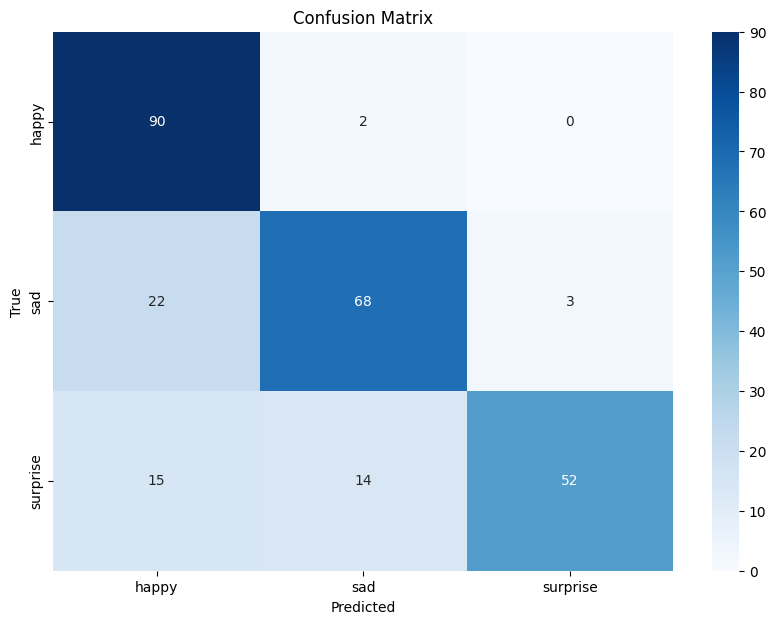

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(test_set_tl2.classes, y_pred_class_tl2)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_set_tl2.class_indices.keys(), yticklabels=test_set_tl2.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

untuk confusion matrix untuk mengetahui true positif happy dari 92 data terdetek 90 menunjukan model cukup baik menangkap ekspresi wajah happy

sedangkan untuk true positif sad hanya 68 dari 93 data menunjukan model cukup baik menangkap ekspresi wajah sad

dan surpise dari 81 data menangkap 52 sebagai true positif menunjukan lebih dari 50% dari data

Adapun setelah dilakukan improvement menggunakan transfel learning model mengalami perubahan pada metrics recall f1 score dan accuracy tetapi membuat model menjadi overfit

# 10. Model Saving

setelah dilakukan training menggunakan 4 model ANN maka model yang dipilih atau yang terbaik berdasarkan akurasi model dan tidak overfitnya model dipilihlah model ANN dengan improvement Augmentation

In [18]:
# Save model in Keras format
model_aug.save('model_aug_best.keras')



# 11. Kesimpulan

setelah pembuatan dengan 3 model improvement terdapat kelebihan dan kekuranganya
model augmentasi memiliki accuracy yang rendah dibandingkan dengan menggunakan transfer learning,sebaliknya model transfer learning memilik accuracy yang cukup baik, tetapi model cenderung overfit

hasilnya model yang digunakan yang dijadikan model prediction adalah model dengan improvement augmentation dikarnakan model ini menjadi model yang baik dibandingkan dengan model lainnya dikarnakan pada menggunakan transfer learning model yang menggunakan transfer learning cenderung overfit walaupun metrics accuracy nya yang naik atau ada perbaikan dari model sebelumnya, oleh karna itu model augmentationlah dipilih dengan accuracy 0.61 tetapi model tidak cenderung overfit

dengan model yang didapat saya bisa memprediksi ekspresi siswa/i yang masuk ke ruangan kelas dengan accuracy 0.61